# Gradient Descent
<div style="text-align: right"> (C) Nikolai Nowaczyk, Jörg Kienitz 2020</div>

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import ipywidgets as wd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Let $f:\mathbb{R}^n \to \mathbb{R}$ be a differentiable function. Gradient descent is a class of methods to find the minimum
$$ \min_{x \in \mathbb{R}^n}{f(x)}$$

One method to find a minimum is to find a zero of the gradient $\nabla f$, for example via Newton's method. However, this requires the computation of the Hessian of $f$, which can be quite costly. Gradient descent is an alternative method, which only requires the computation of the gradient of $f$, but not the Hessian.

## Basic Algorithm
The basic idea of gradient descent is simple: Start with an arbitrary guess $x_0 \in \mathbb{R}^n$ and then recursively descent into the direction negative gradient:
$$ x_{n+1} = x_n - \alpha_n \nabla f(x_n)$$
Here, the $\alpha_n \in \mathbb{R}$ are a choice of *step sizes*. This method is motivated by the below mathematical background.

## Mathematical Background
The key principles behind gradient descent rely on the following simple insights:

**Lemma**: Let $f:\mathbb{R}^n \to \mathbb{R}$ be a differentiable function and $x_0 \in \mathbb{R}^n$. 
1. For any $v \in \mathbb{R}^n$, the directional derivative $\partial _v f$ satisfies
\begin{align*}
    \lim_{t \searrow 0}\frac{f(x_0 + tv)}{t} = \partial_v f(x_0) =\nabla f(x_0) v = \langle \nabla f(x_0)^{\top}, v \rangle 
\end{align*}
2. The negative gradient is the direction of steepest descent, i.e.
\begin{align*}
    \underset{\|v\|=1}{\operatorname{argmin}}\partial_v f(x_0) = - \frac{\nabla f(x_0)}{\|\nabla f(x_0)\|},
\end{align*}
provided $\nabla f(x_0) \neq 0$.

**Proof**: The first claim is the definition of directional derivative and an application of the chain rule. To see the second claim, denote by $\vartheta$ the angle between $\nabla f(x_0)$ and a $v \in \mathbb{R}^n$, $\|v\|=1$. By definition of the angle
$$ \cos(\vartheta) = \langle \nabla f(x_0)^T, v \rangle \|\nabla f(x_0)\| ,$$
thus
$$\partial_v f(x_0) = \langle \nabla f(x_0)^T, v \rangle = \frac{\cos(\vartheta)}{\|\nabla f(x_0)\|}, $$
which becomes smallest when $\cos(\vartheta)=-1$, i.e. when $v = -\frac{\nabla f(x_0)}{\|\nabla f(x_0)\|}$.

**Interpretation:** This means that at any point $x_0 \in \mathbb{R}^n$ descending an infinitesimal step into the direction of $-\nabla f(x_0)$ decreases $f$ most. The problem with that view is that 1) in reality, one needs to chose a finite step size and 2) this only yields a local minimum of $f$.

## Example

In [58]:
def f(x):
    return x[0]**2 + x[1]**2

def df(x):
    return 2*(x[0]+x[1])

def gradient_descent_sequence(x0, f, df, N):
    X = np.zeros((N+1, x0.shape[0]))
    X[0] = x0
    alpha=0.1
    for n in range(N):
        X[n+1] = X[n] - alpha * df(X[n])
    return X

<IPython.core.display.Javascript object>


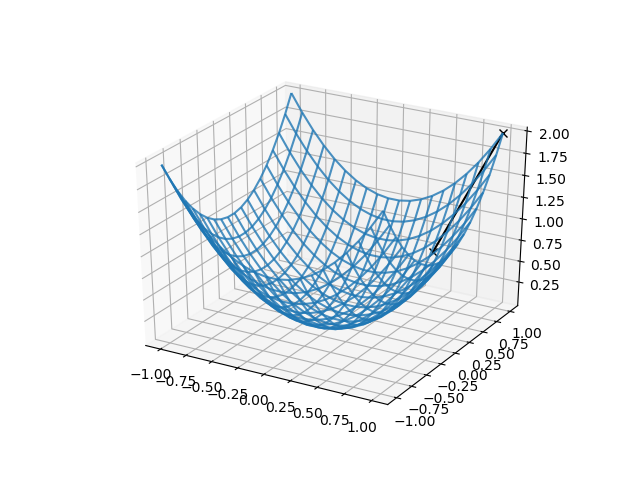

interactive(children=(IntSlider(value=1, description='N', max=20, min=1), Output()), _dom_classes=('widget-int…

In [59]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)
Z = np.array([[f(np.array([xx, yy])) for xx in x] for yy in y])

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

@wd.interact(N=wd.IntSlider(min=1, max=20, value=1))
def plot_gradient_descent(N):
    ax.clear()
    ax.plot_wireframe(X, Y, Z, alpha=0.8, cmap=cm.coolwarm)
    Xgd = gradient_descent_sequence(np.array([1, 1]), f, df, N)
    ax.plot(Xgd[:, 0], Xgd[:, 1], np.array([f(xx) for xx in Xgd]), marker='x', color='k')
    plt.show()